Имеется информация о пользователях и платежах крупного дейтингового приложения.
Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. 
Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.
Всего есть три группы: тестовая (test), контрольная 1 (control_1) и контрольная 2 (control_2)

Необходимо проверить, был ли эксперимент успешен в целом.

Для ответа на вопрос были выполнены следующие шаги:
1. Предварительный анализ данных
2. Проверка на равномерность распределения в группах по характеристикам
3. Выбор метрик и сравнение их с тестовыми показателями
4. Вывод по результатам эксперимента


In [128]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from datetime import datetime

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pingouin as pg

In [129]:
users_test = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-j-semenova/Project_2/Проект_3_users_test.csv', sep=';')
transactions_test = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-j-semenova/Project_2/Проект_3_transactions_test.csv', sep=';')
users_control_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-j-semenova/Project_2/Проект_3_users_control_1.csv', sep=';')
transactions_control_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-j-semenova/Project_2/Проект_3_transactions_control_1.csv', sep=';')
users_control_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-j-semenova/Project_2/Проект_3_users_control_2.csv', sep=';')
transactions_control_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-j-semenova/Project_2/Проект_3_transactions_control_2.csv', sep=';')                                    

1. Для начала посмотрю на данные отдельно по пользователям и транзакциям.

1.1 Информация по пользователям.

После загрузки данных, проверяю наличие пропущенных значений:

In [130]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


In [131]:
users_test.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

In [132]:
users_test.nunique()

uid                 4308
age                   57
attraction_coeff     600
coins                 28
country               51
visit_days           891
gender                 2
age_filter_start      51
age_filter_end        78
views_count          331
was_premium            1
is_premium             1
total_revenue        105
dtype: int64

В колонке is_premium и was_premium выводится только значение равное 1,т.е. является ли премиум и был премиум. Для  NAN поставлю значения 0 (не является, не являлся). Для visit_days предположу, что NAN -  пользователь не посещал приложение за анализируемый период, coins - пользователь не имеет внутренней валюты, если NAN

In [133]:
users_test[['is_premium','visit_days', 'was_premium', 'coins']] = users_test[['is_premium','visit_days', 'was_premium', 'coins']]. fillna (0)

Посмотрю есть ли дубликаты в таблице:

In [134]:
users_test.loc[users_test.duplicated()] #дубликатов нет

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue


In [135]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0.0,0
1,892044516,27,0,0.0,Germany,0,1,24,30,0,0.0,0.0,0
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0.0,0
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0
4,891406035,27,1000,0.0,France,0,1,24,30,1,1.0,0.0,0


Для дальнейшей работы создам колонку group с названием группы и удалю колонки, которые я не буду использовать для анализа:

In [136]:
users_test['group'] = 'users_test'

In [137]:
users_test.drop(['age_filter_start','age_filter_end','views_count'], axis= 1 , inplace= True )

In [138]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,was_premium,is_premium,total_revenue,group
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,0.0,0.0,0,users_test
1,892044516,27,0,0.0,Germany,0,1,0.0,0.0,0,users_test
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,0.0,0.0,0,users_test
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,0.0,0.0,0,users_test
4,891406035,27,1000,0.0,France,0,1,1.0,0.0,0,users_test


In [139]:
users_test.uid.nunique()

4308

В таблице присутствуют только уникальные пользователи.

Проделаю те же действия с данными для users_control_1 и users_control_2:

In [140]:
users_control_1.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

In [141]:
users_control_2.isna().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4203
country                0
visit_days          1364
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3853
is_premium          4073
total_revenue          0
dtype: int64

Так же присутствуют NAN в тех же колонках, аналогично заменяю их на 0:

In [142]:
users_control_1[['is_premium','visit_days', 'was_premium', 'coins']] = users_control_1[['is_premium','visit_days', 'was_premium', 'coins']]. fillna (0)

In [143]:
users_control_2[['is_premium','visit_days', 'was_premium', 'coins']] = users_control_2[['is_premium','visit_days', 'was_premium', 'coins']]. fillna (0)

In [144]:
users_control_1.loc[users_control_1.duplicated()] #дубликатов нет

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue


In [145]:
users_control_2.loc[users_control_2.duplicated()] #дубликатов нет

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue


In [146]:
users_control_1['group'] = 'users_control_1'

In [147]:
users_control_2['group'] = 'users_control_2'

In [148]:
users_control_1.drop(['age_filter_start','age_filter_end','views_count'], axis= 1 , inplace= True )

In [149]:
users_control_2.drop(['age_filter_start','age_filter_end','views_count'], axis= 1 , inplace= True )

In [150]:
users_control_1.uid.nunique()

4340

In [151]:
users_control_2.uid.nunique()

4264

В группах users_control_1 и users_control_2 только уникальные пользователи.

Так же я хочу проверить нет ли пересечения между пользователями в разных группах с помощью множеств:

In [152]:
users_test_01 = set(users_test.uid)
users_control_2_11 = set(users_control_2.uid)

users_test_01.intersection(users_control_2_11)

set()

In [153]:
users_test_01 = set(users_test.uid)
users_control_1_12 = set(users_control_1.uid)

users_test_01.intersection(users_control_1_12)

set()

In [154]:
users_control_2_11 = set(users_control_2.uid)
users_control_1_12 = set(users_control_1.uid)

users_control_2_11.intersection(users_control_1_12)

set()

Пересечений между группами нет, то есть дальнейшее проведение тестов валидно.

1.2 Информация по платежам пользователей

После загрузки данных, проверяю наличие пропущенных значений:

In [155]:
transactions_test.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


In [156]:
transactions_test.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

In [157]:
transactions_control_2.isna().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

In [158]:
transactions_control_1.isna().sum()

uid             630
country         630
joined_at         0
paid_at           0
revenue         630
payment_id      630
from_page       630
product_type    630
dtype: int64

В transactions_control_1 присутствуют пустые строки, удаляю их:

In [159]:
transactions_control_1 = transactions_control_1.dropna()

Проверяю на наличие дубликатов, удаляю если они есть:

In [160]:
transactions_test.loc[transactions_test.duplicated()] #есть дубликаты

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
55,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
96,892050108,Israel,2017-10-22 03:02:00,2017-10-23 02:53:00,1261,19,empty_likes,coins
127,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
158,891508155,Latvia,2017-02-11 09:46:00,2017-03-11 22:06:00,936,19,empty_likes,coins
188,892236423,United States of America,2017-10-18 01:09:00,2017-10-22 22:08:00,1261,19,empty_likes,coins
205,892202526,United States of America,2017-10-18 20:34:00,2017-10-20 19:54:00,897,19,menu,coins
243,892339626,United States of America,2017-10-15 23:21:00,2017-10-20 18:14:00,754,19,empty_likes,coins


In [161]:
transactions_test = transactions_test.drop_duplicates()

In [162]:
transactions_control_1.loc[transactions_control_1.duplicated()].head() #есть дубликаты

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
47,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783.0,67.0,menu,other_type
88,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783.0,67.0,empty_admins,other_type
93,891367521.0,Italy,2017-05-11 02:37:00,2017-10-11 01:52:00,1469.0,19.0,sympathy,other_type
169,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783.0,67.0,menu,other_type
176,892207959.0,France,2017-10-18 18:30:00,2017-10-22 04:49:00,1261.0,19.0,empty_likes,coins


In [163]:
transactions_control_1 = transactions_control_1.drop_duplicates()

In [164]:
transactions_control_2.loc[transactions_control_2.duplicated()].head() #есть дубликаты

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
86,891862596,Italy,2017-10-26 01:40:00,2017-10-30 09:01:00,1261,19,empty_likes,coins
235,892064328,United States of America,2017-10-21 20:54:00,2017-10-22 01:30:00,6305,19,empty_likes,coins
241,892009254,Italy,2017-10-22 22:57:00,2017-10-23 00:06:00,2353,67,empty_likes,other_type
288,892062660,United States of America,2017-10-21 21:28:00,2017-10-31 00:53:00,1261,19,empty_likes,coins
321,892045743,Israel,2017-10-22 07:04:00,2017-10-23 20:17:00,1261,19,empty_likes,coins


In [165]:
transactions_control_2 = transactions_control_2.drop_duplicates()

По условию задачи тестирование проводилось только для нескольких стран, нужно проверить совпадает ли количество стран и есть ли они во всех трех группах:

In [166]:
transactions_test.country.nunique()

17

In [167]:
transactions_control_1.country.nunique()

18

In [168]:
transactions_control_2.country.nunique()

19

In [169]:
transactions_test.country.unique()

array(['Italy', 'United States of America', 'Canada', 'Spain',
       'United Arab Emirates', 'Argentina', 'Latvia', 'France',
       'United Kingdom (Great Britain)', 'Israel', 'Switzerland',
       'Germany', 'Belgium', 'Chile', 'Australia', 'Mexico', 'Turkey'],
      dtype=object)

In [170]:
country_test= pd.DataFrame()
country_test['country']= ['Italy', 'United States of America', 'Canada', 'Spain',
       'United Arab Emirates', 'Argentina', 'Latvia', 'France',
       'United Kingdom (Great Britain)', 'Israel', 'Switzerland',
       'Germany', 'Belgium', 'Chile', 'Australia', 'Mexico', 'Turkey']
country_test['group']='test'

In [171]:
transactions_control_1.country.unique()

array(['France', 'Israel', 'Italy', 'United States of America',
       'Australia', 'Chile', 'India', 'United Arab Emirates',
       'United Kingdom (Great Britain)', 'Argentina', 'Switzerland',
       'Canada', 'Turkey', 'Portugal', 'Germany', 'Russian Federation',
       'Spain', 'Belgium'], dtype=object)

In [172]:
country_control_1 = pd.DataFrame()
country_control_1['country']= ['France', 'Israel', 'Italy', 'United States of America',
       'Australia', 'Chile', 'India', 'United Arab Emirates',
       'United Kingdom (Great Britain)', 'Argentina', 'Switzerland',
       'Canada', 'Turkey', 'Portugal', 'Germany', 'Russian Federation',
       'Spain', 'Belgium']
country_control_1['group']='control_1'

In [173]:
transactions_control_2.country.unique()

array(['Argentina', 'Chile', 'United States of America', 'Spain',
       'Switzerland', 'France', 'Italy', 'Portugal',
       'United Kingdom (Great Britain)', 'Australia', 'Belgium', 'Israel',
       'United Arab Emirates', 'Germany', 'Lithuania', 'Ukraine',
       'Canada', 'Turkey', 'Austria'], dtype=object)

In [174]:
country_control_2= pd.DataFrame()
country_control_2['country']= ['Argentina', 'Chile', 'United States of America', 'Spain',
       'Switzerland', 'France', 'Italy', 'Portugal',
       'United Kingdom (Great Britain)', 'Australia', 'Belgium', 'Israel',
       'United Arab Emirates', 'Germany', 'Lithuania', 'Ukraine',
       'Canada', 'Turkey', 'Austria']
country_control_2['group']='control_2'

In [175]:
country = pd.concat([country_test, country_control_1, country_control_2])#объединяю все 3 группы стран

In [176]:
country=country.groupby('country', as_index=False).agg({'group':'count'})#группирую по стране и считаю количество входящих групп

In [177]:
country_filter_test=country.query('group==3')#страны, в которых присутствуют все 3 группы

In [178]:
country_filter_test

,country,group
0,Argentina,3
1,Australia,3
3,Belgium,3
4,Canada,3
5,Chile,3
6,France,3
7,Germany,3
9,Israel,3
10,Italy,3
16,Spain,3


In [179]:
country_filter_test = list(country_filter_test.country)#создала список стран, по которым буду корректировать начальные данные по пользователям

In [180]:
country_filter_test

['Argentina',
 'Australia',
 'Belgium',
 'Canada',
 'Chile',
 'France',
 'Germany',
 'Israel',
 'Italy',
 'Spain',
 'Switzerland',
 'Turkey',
 'United Arab Emirates',
 'United Kingdom (Great Britain)',
 'United States of America']

Оставляю только те данные, которые попадают в список:

In [181]:
transactions_test = transactions_test.query("country in @country_filter_test")
transactions_control_2 = transactions_control_2.query("country in @country_filter_test")
transactions_control_1 = transactions_control_1.query("country in @country_filter_test")

users_test = users_test.query("country in @country_filter_test") #так же привожу к единообразию данные о пользователях
users_control_2 = users_control_2.query("country in @country_filter_test")
users_control_1 = users_control_1.query("country in @country_filter_test")

Делаю проверку, должно остаться 15 стран в каждой группе:

In [182]:
transactions_test.country.nunique()

15

In [183]:
transactions_control_2.country.nunique()

15

In [184]:
transactions_control_1.country.nunique()

15

Проверяю типы данных, меняю тип для даты регистрации и покупки:

In [185]:
transactions_test.dtypes

uid              int64
country         object
joined_at       object
paid_at         object
revenue          int64
payment_id       int64
from_page       object
product_type    object
dtype: object

In [186]:
transactions_control_1.dtypes

uid             float64
country          object
joined_at        object
paid_at          object
revenue         float64
payment_id      float64
from_page        object
product_type     object
dtype: object

In [187]:
transactions_control_1.dtypes

uid             float64
country          object
joined_at        object
paid_at          object
revenue         float64
payment_id      float64
from_page        object
product_type     object
dtype: object

In [188]:
transactions_control_2.dtypes

uid              int64
country         object
joined_at       object
paid_at         object
revenue          int64
payment_id       int64
from_page       object
product_type    object
dtype: object

In [189]:
transactions_test.joined_at = pd.to_datetime(transactions_test.joined_at)
transactions_test.paid_at = pd.to_datetime(transactions_test.paid_at)
transactions_control_2.joined_at = pd.to_datetime(transactions_control_2.joined_at)
transactions_control_2.paid_at = pd.to_datetime(transactions_control_2.paid_at)
transactions_control_1.joined_at = pd.to_datetime(transactions_control_1.joined_at)
transactions_control_1.paid_at = pd.to_datetime(transactions_control_1.paid_at)

Проверяю, принадлежат ли группы к одному временному промежутку для справедливости проводимого эксперимента:

In [190]:
transactions_test.describe(datetime_is_numeric=True)

,uid,joined_at,paid_at,revenue,payment_id
count,2.610000e+02,261,261,261.000000,261.000000
mean,8.918334e+08,2017-09-08 04:44:07.586206976,2017-09-06 20:08:57.011494144,8876.808429,100.034483
min,8.910712e+08,2017-01-11 03:07:00,2017-01-11 04:37:00,533.000000,0.000000
25%,8.914971e+08,2017-08-11 07:24:00,2017-07-11 21:25:00,3523.000000,19.000000
50%,8.919079e+08,2017-10-19 05:48:00,2017-10-22 22:08:00,7098.000000,146.000000
75%,8.920979e+08,2017-10-23 13:08:00,2017-10-29 07:48:00,12610.000000,147.000000
max,8.924386e+08,2017-10-31 23:40:00,2017-12-11 22:06:00,113477.000000,147.000000
std,3.780810e+05,NaN,NaN,11289.647451,57.303399


In [191]:
transactions_control_2.describe(datetime_is_numeric=True)

,uid,joined_at,paid_at,revenue,payment_id
count,3.050000e+02,305,305,305.000000,305.000000
mean,8.918049e+08,2017-09-17 14:16:03.540983552,2017-09-04 01:01:54.491803392,5968.449180,97.724590
min,8.910681e+08,2017-01-11 08:36:00,2017-01-11 22:36:00,481.000000,0.000000
25%,8.915168e+08,2017-10-11 06:38:00,2017-07-11 10:58:00,2366.000000,19.000000
50%,8.918414e+08,2017-10-20 08:38:00,2017-10-21 20:08:00,4732.000000,146.000000
75%,8.921281e+08,2017-10-26 02:05:00,2017-10-28 17:58:00,6344.000000,147.000000
max,8.924388e+08,2017-10-31 17:43:00,2017-12-11 23:28:00,81796.000000,147.000000
std,3.869460e+05,NaN,NaN,6725.744631,56.731155


In [192]:
transactions_control_1.describe(datetime_is_numeric=True)

,uid,joined_at,paid_at,revenue,payment_id
count,3.470000e+02,347,347,347.000000,347.000000
mean,8.918002e+08,2017-08-29 00:49:37.694524672,2017-09-06 04:10:53.948126720,7103.582133,94.619597
min,8.910923e+08,2017-01-11 01:06:00,2017-01-11 02:56:00,481.000000,0.000000
25%,8.913806e+08,2017-06-11 17:57:00,2017-07-11 12:47:00,2860.000000,19.000000
50%,8.918067e+08,2017-10-17 03:36:00,2017-10-17 02:23:00,6292.000000,146.000000
75%,8.921398e+08,2017-10-23 12:55:00,2017-10-28 10:34:30,7891.000000,147.000000
max,8.924233e+08,2017-10-31 22:17:00,2017-12-11 21:57:00,63037.000000,147.000000
std,3.988893e+05,NaN,NaN,8056.003170,58.036907


Для transactions_test,transactions_control_1, transactions_control_2 даты регистрации joined_at (2017-01-11 по 2017-10-31) и даты покупки paid_at (2017-01-11 по 2017-12-11) совершали в 2017 году, все группы принадлежат к одному временному промежутку.

По условию задачи изменилась стоимость покупки премиум-подписки, хочу более детально посмотреть на даты продаж по продукту premium_no_trial:

Для удобства группировки добавлю новые столбцы, по которым можно посмотреть разбивку по месяцам:

In [193]:
transactions_control_2['month_paid_at'] = transactions_control_2.paid_at.dt.month
transactions_control_1['month_paid_at'] = transactions_control_1.paid_at.dt.month
transactions_test['month_paid_at'] = transactions_test.paid_at.dt.month

In [194]:
transactions_control_1.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,month_paid_at
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium,12
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium,10
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins,12
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type,6
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins,12


Построю графики количества покупок по продукту premium_no_trial по месяцам:

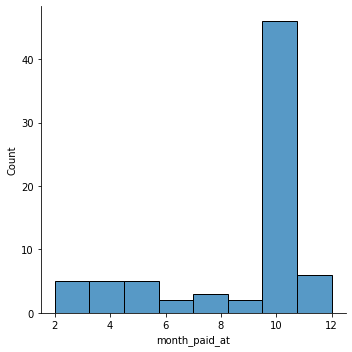

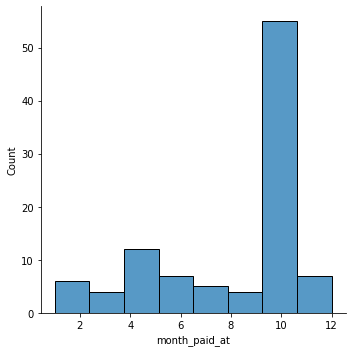

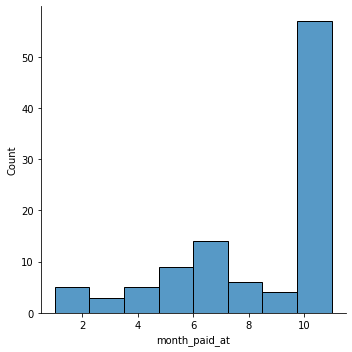

In [195]:
transactions_test_premium_no_trial=transactions_test.query('product_type=="premium_no_trial"')
sns.displot(data=transactions_test_premium_no_trial, x="month_paid_at")
transactions_control_2_premium_no_trial=transactions_control_2.query('product_type=="premium_no_trial"')
sns.displot(data=transactions_control_2_premium_no_trial, x="month_paid_at")
transactions_control_1_premium_no_trial=transactions_control_1.query('product_type=="premium_no_trial"')
sns.displot(data=transactions_control_1_premium_no_trial, x="month_paid_at")

Можно сделать вывод, что значительный подъем продаж по продукту premium_no_trial наблюдается в октябре, скорее всего именно в это время был проведен A/B тест, далее буду оценивать только тех, кто совершил покупку в октябре.
Перезаписываю данные:

In [196]:
transactions_control_2 = transactions_control_2.query('month_paid_at>=10')
transactions_control_1 = transactions_control_1.query('month_paid_at>=10')
transactions_test = transactions_test.query('month_paid_at>=10')

Так же посмотрю на значения revenue:

In [197]:
transactions_control_2.describe()

,uid,revenue,payment_id,month_paid_at
count,2.020000e+02,202.000000,202.000000,202.000000
mean,8.919278e+08,5953.806931,93.787129,10.207921
std,3.789999e+05,7771.518583,57.607604,0.484934
min,8.910681e+08,689.000000,19.000000,10.000000
25%,8.916772e+08,2197.000000,19.000000,10.000000
50%,8.920457e+08,4602.000000,146.000000,10.000000
75%,8.922125e+08,6305.000000,147.000000,10.000000
max,8.924388e+08,81796.000000,147.000000,12.000000


В данных заметила сильные отличия между max и mean для revenue, сделаю разрезы по пользователям: 

In [198]:
transactions_control_2.groupby('uid', as_index=False).agg({'revenue':'sum'}).sort_values('revenue', ascending=False)

,uid,revenue
34,891778551,81796
95,892307238,75647
89,892230228,27729
78,892128138,24544
97,892318245,22685
...,...,...
1,891075072,2327
15,891365604,2158
93,892272390,1859
5,891118668,1794


In [199]:
transactions_control_2.query('uid==891778551 or uid==892307238') #'провалюсь' в пользователей с самыми большими значениями revenue

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,month_paid_at
22,892307238,Spain,2017-10-16 16:01:00,2017-10-16 20:41:00,63037,147,left_sidebar_menu,premium_no_trial,10
47,891778551,United Arab Emirates,2017-10-27 21:26:00,2017-10-27 22:30:00,81796,147,left_sidebar_menu,premium_no_trial,10
87,892307238,Spain,2017-10-16 16:01:00,2017-10-16 20:42:00,12610,19,menu,coins,10


Никакой подозрительной активности не обнаружила, оставляю их в данных.

Так же раскрываю данные для двух других групп:

In [200]:
transactions_control_1.groupby('uid', as_index=False).agg({'revenue':'sum'}).sort_values('revenue', ascending=False)

,uid,revenue
115,892333905.0,403104.0
102,892216461.0,64298.0
121,892366260.0,56719.0
126,892421277.0,47723.0
73,892069554.0,42874.0
...,...,...
36,891613833.0,1898.0
62,891983730.0,1742.0
94,892176342.0,1508.0
49,891792453.0,1313.0


In [201]:
transactions_control_1.query('uid==892333905.0')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,month_paid_at
6,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 02:08:00,12610.0,19.0,gifts,coins,10
13,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:44:00,3783.0,67.0,menu,other_type,10
28,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:57:00,3783.0,67.0,empty_admins,other_type,10
43,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:58:00,3783.0,67.0,empty_admins,other_type,10
49,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 01:42:00,3783.0,67.0,menu,other_type,10
63,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 22:35:00,31525.0,19.0,menu,coins,10
76,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 18:42:00,31525.0,19.0,fans,coins,10
126,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 22:39:00,19773.0,146.0,menu,coins,10
137,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 02:08:00,31525.0,19.0,gifts,coins,10
143,892333905.0,Italy,2017-10-16 01:38:00,2017-10-16 13:10:00,63037.0,147.0,no_sympathy,premium_no_trial,10


В течение 2х дней пользователь совершил 19 операций, в основном это покупки внутренней валюты, скорее это нетипично, но не буду  удалять этого пользователя из анализа.

In [202]:
transactions_test.groupby('uid', as_index=False).agg({'revenue':'sum'}).sort_values('revenue', ascending=False)

,uid,revenue
59,892038759,123565
86,892236423,86996
76,892150854,61789
87,892248561,38779
47,891914619,35308
...,...,...
79,892202526,1794
46,891914511,1508
91,892333656,897
45,891914322,741


In [203]:
transactions_test.query('uid==892038759.0')

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,month_paid_at
155,892038759,United Arab Emirates,2017-10-22 11:12:00,2017-10-22 11:46:00,6305,19,empty_likes,coins,10
196,892038759,United Arab Emirates,2017-10-22 11:12:00,2017-10-22 16:23:00,113477,147,autoreply_message,premium_no_trial,10
198,892038759,United Arab Emirates,2017-10-22 11:12:00,2017-10-22 11:36:00,3783,67,empty_likes,other_type,10


Считаю, что в данных transactions_test все в порядке.

Попробую определить через какие именно платежные системы проводилась продажа продукта premium_no_trial:

In [204]:
transactions_control_1_platform=transactions_control_1.query('product_type=="premium_no_trial"')

In [205]:
transactions_control_1_platform.payment_id.unique()

array([147.,  68.,   0.])

In [206]:
transactions_control_2_platform=transactions_control_2.query('product_type=="premium_no_trial"')

In [207]:
transactions_control_2_platform.payment_id.unique()

array([147,  68])

In [208]:
transactions_test_platform=transactions_test.query('product_type=="premium_no_trial"')

In [209]:
transactions_test_platform.payment_id.unique()

array([147,  68,   0])

В двух группах из трех присутствуют по 3 платформы, посмотрю на них в разрезе пользователей:

In [210]:
transactions_control_1_platform.groupby('uid', as_index=False).agg({'revenue':'count'}).sort_values('revenue', ascending=False).head()

,uid,revenue
25,892101909.0,2
50,892393119.0,2
48,892366260.0,2
43,892290105.0,2
0,891092322.0,1


In [211]:
transactions_control_1.query('uid==892393119.0 or uid==892101909.0 or uid==892290105.0').sort_values('uid', ascending=False)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,month_paid_at
42,892393119.0,Italy,2017-10-15 00:34:00,2017-10-21 13:10:00,1807.0,68.0,none,premium_no_trial,10
141,892393119.0,Italy,2017-10-15 00:34:00,2017-10-21 13:09:00,1807.0,68.0,none,premium_no_trial,10
77,892290105.0,United States of America,2017-10-16 22:03:00,2017-10-11 17:18:00,1261.0,19.0,empty_likes,coins,10
208,892290105.0,United States of America,2017-10-16 22:03:00,2017-10-21 22:30:00,4537.0,147.0,popular_users_block,premium_no_trial,10
270,892290105.0,United States of America,2017-10-16 22:03:00,2017-10-23 12:50:00,6292.0,147.0,promo_09,premium_no_trial,10
156,892101909.0,France,2017-10-21 03:28:00,2017-10-23 22:32:00,741.0,146.0,empty_likes,coins,10
189,892101909.0,France,2017-10-21 03:28:00,2017-10-23 22:35:00,923.0,19.0,none,coins,10
210,892101909.0,France,2017-10-21 03:28:00,2017-10-21 03:39:00,6422.0,147.0,none,premium_no_trial,10
347,892101909.0,France,2017-10-21 03:28:00,2017-10-21 03:39:00,6422.0,0.0,none,premium_no_trial,10


По пользователю 892101909.0 указано 2 платформы, paid_at и revenue совпадают, предположу, что payment_id = 0 продублировала платформу 147.

In [212]:
transactions_test_platform.groupby('uid', as_index=False).agg({'revenue':'count'}).sort_values('revenue', ascending=False).head()

,uid,revenue
27,892097937,3
36,892339626,3
12,891725043,2
16,891861048,2
34,892261437,1


In [213]:
transactions_test_platform.query('uid==892097937.0 or uid==891725043.0 or uid==891861048.0 or uid==892339626.0').sort_values('uid', ascending=False)

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,month_paid_at
34,892339626,United States of America,2017-10-15 23:21:00,2017-10-29 07:51:00,2574,68,none,premium_no_trial,10
104,892339626,United States of America,2017-10-15 23:21:00,2017-11-11 01:05:00,2587,68,none,premium_no_trial,11
122,892339626,United States of America,2017-10-15 23:21:00,2017-10-17 18:58:00,2613,68,none,premium_no_trial,10
79,892097937,Chile,2017-10-21 06:24:00,2017-10-31 03:22:00,8086,147,popular_users_chat,premium_no_trial,10
120,892097937,Chile,2017-10-21 06:24:00,2017-10-22 12:58:00,8216,147,popular_users_chat,premium_no_trial,10
171,892097937,Chile,2017-10-21 06:24:00,2017-10-23 13:56:00,8229,147,popular_users_chat,premium_no_trial,10
11,891861048,Canada,2017-10-26 02:55:00,2017-10-11 19:00:00,3588,68,none,premium_no_trial,10
234,891861048,Canada,2017-10-26 02:55:00,2017-10-26 03:00:00,3588,68,none,premium_no_trial,10
152,891725043,United Arab Emirates,2017-10-29 00:49:00,2017-10-29 07:48:00,9217,147,none,premium_no_trial,10
220,891725043,United Arab Emirates,2017-10-29 00:49:00,2017-10-29 07:48:00,9217,0,none,premium_no_trial,10


По пользователю 891725043.0 указано 2 платформы, paid_at и revenue совпадают, предположу, что payment_id = 0 продублировала платформу 147.

После раскрытия данных пришла к выводу, что 2 новые платежные системы - это 68 и 147, перезаписываю данные:

In [214]:
transactions_control_1=transactions_control_1.query('payment_id != 0')

In [215]:
transactions_test=transactions_test.query('payment_id != 0')

2. Перед проведением тестирования, хочу проверить насколько группы отличаются или не отличаются между собой без учета стоимости премиум подписки, хочу посмотреть на средний портрет пользователя для адеватности выборки групп. Так же важно проверить отличается ли выручка в группах без учета премиум-подписки. Объединяю все транзакции в одну таблицу:

In [216]:
transactions_test['group'] = 'transactions_test'
transactions_control_1['group'] = 'transactions_control_1'
transactions_control_2['group'] = 'transactions_control_2'

In [217]:
transactions = pd.concat([transactions_test, transactions_control_1, transactions_control_2])

In [218]:
transactions.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,month_paid_at,group
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,11,transactions_test
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,10,transactions_test
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,10,transactions_test
3,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type,10,transactions_test
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,10,transactions_test


2.1 Хочу проверить отличается ли выручка в группах (без учета revenue от платной премиум-подписки):

In [219]:
transactions_no_premium_no_trial=transactions.query('product_type != "premium_no_trial"')

Так как групп больше двух, то выбираю дисперсионный анализ, но для этого нужно учесть следующие требования:

-дисперсии внутри наших групп должны быть примерно одинаковы (требование гомогенности дисперсий)

-объемы групп > 30 и близки по размерам друг к другу, поэтому можно исключить требование нормальности распределения.

Для всех тестов ниже выдвигаю две гипотезы:
Н0: распределение пользователей по характеристике не отличается в группах
Н1: распределение пользователей отличается.

In [220]:
transactions_revenue = transactions_no_premium_no_trial.groupby(['uid', 'group'], as_index=False) \
    .agg({'revenue' :'sum'})

Проверяю являются ли дисперсии внутри групп гомогенными с помощью теста Левена.

In [221]:
pg.homoscedasticity(data=transactions_revenue, dv="revenue", group="group")

,W,pval,equal_var
levene,0.504625,0.604343,True


Дисперсии гомогенны

In [222]:
pg.anova(data=transactions_revenue, dv="revenue", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,251,1.103218,0.333405,0.008714


Могу сделать вывод, что p-value больше 0,05 и это не позволяет нам отвергнуть нулевую гипотезу, выручка не от премиум-подписки в среднем одинаковая.

Так же объединю таблицы с пользователями:

In [223]:
users=pd.concat([users_test, users_control_1, users_control_2])

2.2 Хочу оценить разпределение в группах по возрасту:

In [224]:
users.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,was_premium,is_premium,total_revenue,group
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,0.0,0.0,0,users_test
1,892044516,27,0,0.0,Germany,0,1,0.0,0.0,0,users_test
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,0.0,0.0,0,users_test
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,0.0,0.0,0,users_test
4,891406035,27,1000,0.0,France,0,1,1.0,0.0,0,users_test


In [225]:
pg.homoscedasticity(data=users, dv="age", group="group")

,W,pval,equal_var
levene,0.323518,0.723605,True


Дисперсии гомогенны

In [226]:
pg.anova(data=users, dv="age", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,12428,0.451887,0.636437,0.000073


Могу сделать вывод, что p-value больше 0,05, это не позволяет нам отвергнуть нулевую гипотезу, группы не отличаются по возрасту.

2.3 Посмотрю распределение по полу:

Пол является категоральной переменной, буду использовать критери ХИ-квадрат, для этого должно соблюдаться 2 условия:

- все наблюдения независимы (пересечения по пользователям было проверено ранее, условие подходит)

- количество наблюдений в каждой ячейке больше 5 (соблюдается)

Сделаю кросстабуляцию:

In [227]:
pd.crosstab(users.gender, users.group)

group,users_control_1,users_control_2,users_test
gender,,,
0,180,188,191
1,4009,3912,3951


In [228]:
exp, obs, stats = pg.chi2_independence(data=users, 
                                       x="group", 
                                       y="gender")

In [229]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.590833,2.0,0.744221,0.006894,0.097188
1,cressie-read,0.666667,0.592202,2.0,0.743712,0.006902,0.097304
2,log-likelihood,0.000000,0.594986,2.0,0.742678,0.006918,0.097538
3,freeman-tukey,-0.500000,0.597118,2.0,0.741887,0.006931,0.097718
4,mod-log-likelihood,-1.000000,0.599286,2.0,0.741083,0.006943,0.097901
5,neyman,-2.000000,0.603735,2.0,0.739436,0.006969,0.098277


По полу пользователи распределены равномерно (все значения p-val выше 0,05)

2.4 Количество стран было скорректировано ранее по присутствию всех трех групп, теперь хочу посмотреть распределения (страна-категоральная переменная):

In [230]:
pd.crosstab(users.country, users.group)

group,users_control_1,users_control_2,users_test
country,,,
Argentina,389,397,396
Australia,50,51,62
Belgium,108,90,92
Canada,134,134,137
Chile,287,286,272
France,370,376,359
Germany,188,202,209
Israel,109,78,106
Italy,338,293,323


In [231]:
exp, obs, stats = pg.chi2_independence(data=users, 
                                       x="group", 
                                       y="country")

In [232]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,22.632074,28.0,0.751225,0.030171,0.390360
1,cressie-read,0.666667,22.651620,28.0,0.750270,0.030184,0.390737
2,log-likelihood,0.000000,22.708553,28.0,0.747484,0.030222,0.391837
3,freeman-tukey,-0.500000,22.767125,28.0,0.744604,0.030261,0.392969
4,mod-log-likelihood,-1.000000,22.839608,28.0,0.741025,0.030309,0.394369
5,neyman,-2.000000,23.027691,28.0,0.731653,0.030434,0.398004


Делаю вывод, что распределение по странам равномерно.

Вывод : группы  по полу, гендеру, стране статистически не различаются между собой, портрет пользователя совпадает во всех группах - это значит, что группы были сформированы верно.

По условию задачи интересуют пользователи, у которых была изменена стоимость премиум-подписки, поэтому оставлю в данных только их:

In [233]:
transactions_premium_no_trial=transactions.query('product_type == "premium_no_trial"').groupby('uid', as_index=False).agg({'revenue':'sum'})

Объединяю transactions с users:

In [234]:
users_transactions_premium_no_trial = users.merge(transactions_premium_no_trial, how = 'left', on = 'uid')

In [235]:
users_transactions_premium_no_trial.shape

(12431, 12)

In [236]:
users_transactions_premium_no_trial['revenue'] = users_transactions_premium_no_trial['revenue']. fillna (0)#заменяю пустые значения, которые появились там, где нет премиум-подписки по пользователю

In [237]:
users_transactions_premium_no_trial.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,was_premium,is_premium,total_revenue,group,revenue
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,0.0,0.0,0,users_test,0.0
1,892044516,27,0,0.0,Germany,0,1,0.0,0.0,0,users_test,0.0
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,0.0,0.0,0,users_test,0.0
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,0.0,0.0,0,users_test,0.0
4,891406035,27,1000,0.0,France,0,1,1.0,0.0,0,users_test,0.0


3. Определю измеримые метрики, которые помогут мне понять был ли эксперимент успешен в целом.

- Конверсия (CR) — отношение числа пользователей, которые выполнили целевое действие (в моем случае это покупка премиум-подписки) к общему числу пользователей.

Так как изменения связаны с изменением revenue,то логично рассчитать показатели дохода:

- ARPPU - средний доход на платящего пользователя.

- ARPU - средний доход с привлечённого пользователя.

3.1 Посмотрю сначала, чему равны показатели конверсий отдельно по группам:

In [238]:
all_test=(len(users_transactions_premium_no_trial.query('group == "users_test"')))
buyers_test=(len(users_transactions_premium_no_trial.query('group == "users_test" and revenue!=0')))
CR_test = round((buyers_test/all_test*100),2)

all_users_control_1=(len(users_transactions_premium_no_trial.query('group == "users_control_1"')))
buyers_users_control_1=(len(users_transactions_premium_no_trial.query('group == "users_control_1" and revenue!=0')))
CR_users_control_1 = round((buyers_users_control_1/all_users_control_1*100),2)

all_users_control_2=(len(users_transactions_premium_no_trial.query('group == "users_control_2"')))
buyers_users_control_2=(len(users_transactions_premium_no_trial.query('group == "users_control_2" and revenue!=0')))
CR_users_control_2 = round((buyers_users_control_2/all_users_control_2*100),2)

print (CR_test, CR_users_control_1, CR_users_control_2)

1.11 1.27 1.44


Конверсия в тестовой группе меньше, чем в контрольных, но перед тем как делать вывод, посмотрю является ли это статистически значимым различием.

Выдвигаю две гипотезы:
Н0: конверсии не отличаются в группах
Н1: конверсии отличаются.

Для начала создам дополнительно колонку, где 1 -была премиум-подписка, 0 - не было

In [239]:
users_transactions_premium_no_trial['for_X'] = users_transactions_premium_no_trial.revenue.apply(lambda x: '1' if x > 0 else '0')

In [240]:
pd.crosstab(users_transactions_premium_no_trial.for_X, users_transactions_premium_no_trial.group)

group,users_control_1,users_control_2,users_test
for_X,,,
0,4136,4041,4096
1,53,59,46


In [241]:
exp, obs, stats = pg.chi2_independence(data=users_transactions_premium_no_trial, 
                                       x="group", 
                                       y="for_X")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.773039,2.0,0.412087,0.011943,0.203977
1,cressie-read,0.666667,1.772514,2.0,0.412196,0.011941,0.203927
2,log-likelihood,0.000000,1.773090,2.0,0.412077,0.011943,0.203982
3,freeman-tukey,-0.500000,1.774947,2.0,0.411695,0.011949,0.204157
4,mod-log-likelihood,-1.000000,1.778034,2.0,0.411060,0.011960,0.204449
5,neyman,-2.000000,1.787929,2.0,0.409031,0.011993,0.205386


Вывод: Тест ХИ-квадрат показал, что p-val  больше 0,05, это значит, что я не могу отвергнуть нулевую гипотезу о том, что конверсии равны.

3.2 ARPU - средний доход с привлеченного пользователя

Посмотрю сначала, чему равны ARPU по группам:

In [242]:
revenue_test=users_transactions_premium_no_trial.query('group == "users_test"').agg({'revenue':'sum'})
ARPU_test = round((revenue_test/all_test),2)


revenue_users_control_1=users_transactions_premium_no_trial.query('group == "users_control_1"').agg({'revenue':'sum'})
ARPU_users_control_1 = round((revenue_users_control_1/all_users_control_1),2)


revenue_users_control_2=users_transactions_premium_no_trial.query('group == "users_control_2"').agg({'revenue':'sum'})
ARPU_users_control_2 = round((revenue_users_control_2/all_users_control_2),2)

print (ARPU_test, ARPU_users_control_1, ARPU_users_control_2)

revenue    123.34
dtype: float64 revenue    106.46
dtype: float64 revenue    120.58
dtype: float64


ARPU в тестовой группе больше, чем в контрольных, но перед тем как делать вывод, посмотрю является ли это статистически значимым различием.

In [243]:
ARPU_metric = users_transactions_premium_no_trial.groupby(['uid', 'group'], as_index=False).agg(sum_revenue_ARPU=('revenue', 'sum'))# формирую таблицу

In [244]:
ARPU_metric

,uid,group,sum_revenue_ARPU
0,891050916,users_control_2,0.0
1,891050997,users_control_1,0.0
2,891051075,users_control_2,0.0
3,891051147,users_test,0.0
4,891051552,users_control_1,0.0
...,...,...,...
12426,892440117,users_test,0.0
12427,892440600,users_control_1,0.0
12428,892440651,users_test,0.0
12429,892440774,users_test,0.0


In [245]:
pg.homoscedasticity(data=ARPU_metric, dv='sum_revenue_ARPU', group='group') #дисперсии гомогенны

,W,pval,equal_var
levene,0.101719,0.903284,True


In [246]:
pg.anova(data=ARPU_metric, dv="sum_revenue_ARPU", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,12428,0.101719,0.903284,0.000016


Вывод: Тест ANOVA показал, что p-val  больше 0,05, это значит, что я не могу отвергнуть нулевую гипотезу о том, что показатели ARPU отличаются между собой.

3.3 ARPPU - средний доход с платящего пользователя.

ARPPU по группам:

In [247]:
ARPPU_test = round((revenue_test/buyers_test),2)

ARPPU_users_control_1 = round((revenue_users_control_1/buyers_users_control_1),2)

ARPPU_users_control_2 = round((revenue_users_control_2/buyers_users_control_2),2)

print (ARPPU_test, ARPPU_users_control_1, ARPPU_users_control_2)

revenue    11105.67
dtype: float64 revenue    8414.43
dtype: float64 revenue    8379.05
dtype: float64


ARPPU в тестовой группе больше, чем в контрольных, но перед тем как делать вывод, посмотрю является ли это статистически значимым различием.

In [248]:
users_transactions_premium_no_trial_ARPPU=users_transactions_premium_no_trial.query('revenue > 0') #платящие пользователи

In [249]:
users_transactions_premium_no_trial_ARPPU.shape

(158, 13)

In [250]:
ARPPU_metric = users_transactions_premium_no_trial_ARPPU.groupby(['uid', 'group'], as_index=False).agg(sum_revenue_ARPPU=('revenue', 'sum'))# формирую таблицу

In [251]:
pg.homoscedasticity(data=ARPPU_metric, dv='sum_revenue_ARPPU', group='group') #дисперсии гомогенны

,W,pval,equal_var
levene,0.198632,0.82006,True


In [252]:
pg.anova(data=ARPPU_metric, dv="sum_revenue_ARPPU", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,155,0.654947,0.520901,0.00838


Вывод: Тест ANOVA показал, что p-val больше 0,05, это значит, что я не могу отвергнуть нулевую гипотезу о том, что показатели ARPPU отличаются между собой.

4. ВЫВОД: По итогу проведенного анализа, выявила, что изменение стоимости премиум-подписки не повлияло на изменение ключевых финансовых показателей, таких как CR, ARPU, ARPPU, следовательно эксперимент в целом не могу признать успешным.
